In [21]:
# Basic Libraries
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import pydot
import seaborn as sns

#Evaluation library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Deep Learning libraries
import tensorflow as tf
from tensorflow.keras import layers
import keras
from keras.models import Sequential
#from keras.layers.core import Dense,Activation,Dropout
from keras.layers import Dense, Activation, Dropout, Reshape, Permute, GRU, BatchNormalization, TimeDistributed,Conv2D,Flatten,MaxPooling2D
from keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
#from keras.utils.np_utils import to_categorical
#from keras.wrappers.scikit_learn import KerasClassifier
from scikeras.wrappers import KerasClassifier

In [4]:
#Split mist dataset into train and test
(X_train,y_train),(X_test,y_test)=mnist.load_data()

In [5]:
X_train.shape

(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
y_train.shape

(60000,)

In [8]:
y_test.shape

(10000,)

In [9]:
X_train=X_train.reshape(X_train.shape[0],28,28,1)
X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [11]:
X_train.shape#1 has used for flatten image

(60000, 28, 28, 1)

In [12]:
X_test.shape

(10000, 28, 28, 1)

In [17]:
input_shape=(28,28,1)

In [14]:
#convert to float fro improve stability, precision, and compatibility
X_train=X_train.astype('float32')
X_test=X_test.astype('float32')

In [15]:
#Scaling the data
X_train /=255
X_test /=255

In [23]:
#Create the model to make ti as convolution layer

model=keras.Sequential()#Neuron connected layer by layer computation will happen in sequntially
model.add(Conv2D(28,kernel_size=(3,3),input_shape=input_shape))#Sliding filter over input image,size matrix 3*3
model.add(MaxPooling2D(pool_size=(2,2)))#Down Sampling dimensionality reduction
model.add(Flatten())#Flatten increase the feature/channel depth decrese the dimensional
model.add(Dense(128,activation=tf.nn.relu))#128neuron compute the weight with sum of input and validate result in relu
model.add(Dropout(0.2))#deactivatet the neuron
model.add(Dense(10,activation=tf.nn.softmax))#output layer validating the result wtih probability of mult class


In [26]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history=model.fit(X_train,y_train,epochs=10,validation_data=(X_test,y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.9946 - loss: 0.0168 - val_accuracy: 0.9858 - val_loss: 0.0618
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9944 - loss: 0.0177 - val_accuracy: 0.9836 - val_loss: 0.0758
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9956 - loss: 0.0125 - val_accuracy: 0.9830 - val_loss: 0.0768
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9962 - loss: 0.0109 - val_accuracy: 0.9856 - val_loss: 0.0683
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9963 - loss: 0.0107 - val_accuracy: 0.9845 - val_loss: 0.0833
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9958 - loss: 0.0123 - val_accuracy: 0.9850 - val_loss: 0.0715
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 11ms/step - accuracy: 0.9967 - loss: 0.0098 - val_accuracy: 0.9842 - val_loss: 0.0741
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9960 -

In [27]:
#Evaluate the accuracy and losses for test
model.evaluate(X_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9801 - loss: 0.0866


[0.07455737143754959, 0.9843999743461609]

In [28]:
y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


In [41]:
y_pred=np.argmax(y_pred,axis=1)

In [32]:
y_test_unique=np.unique(y_test)

In [48]:
y_test_unique

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [42]:
y_pred[1]

2

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
6


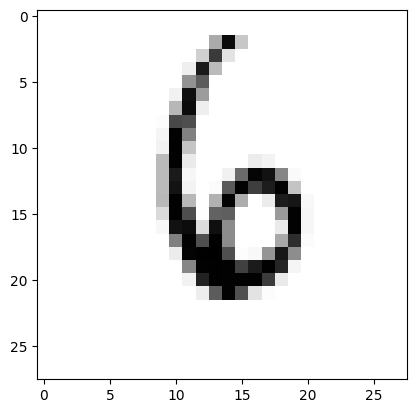

In [30]:
import matplotlib.pyplot as plt
image_index = 6900
plt.imshow(X_test[image_index].reshape(28, 28),cmap='Greys')
predict = X_test[image_index].reshape(28,28)
pred = model.predict(X_test[image_index].reshape(1, 28, 28, 1))
print(pred.argmax())

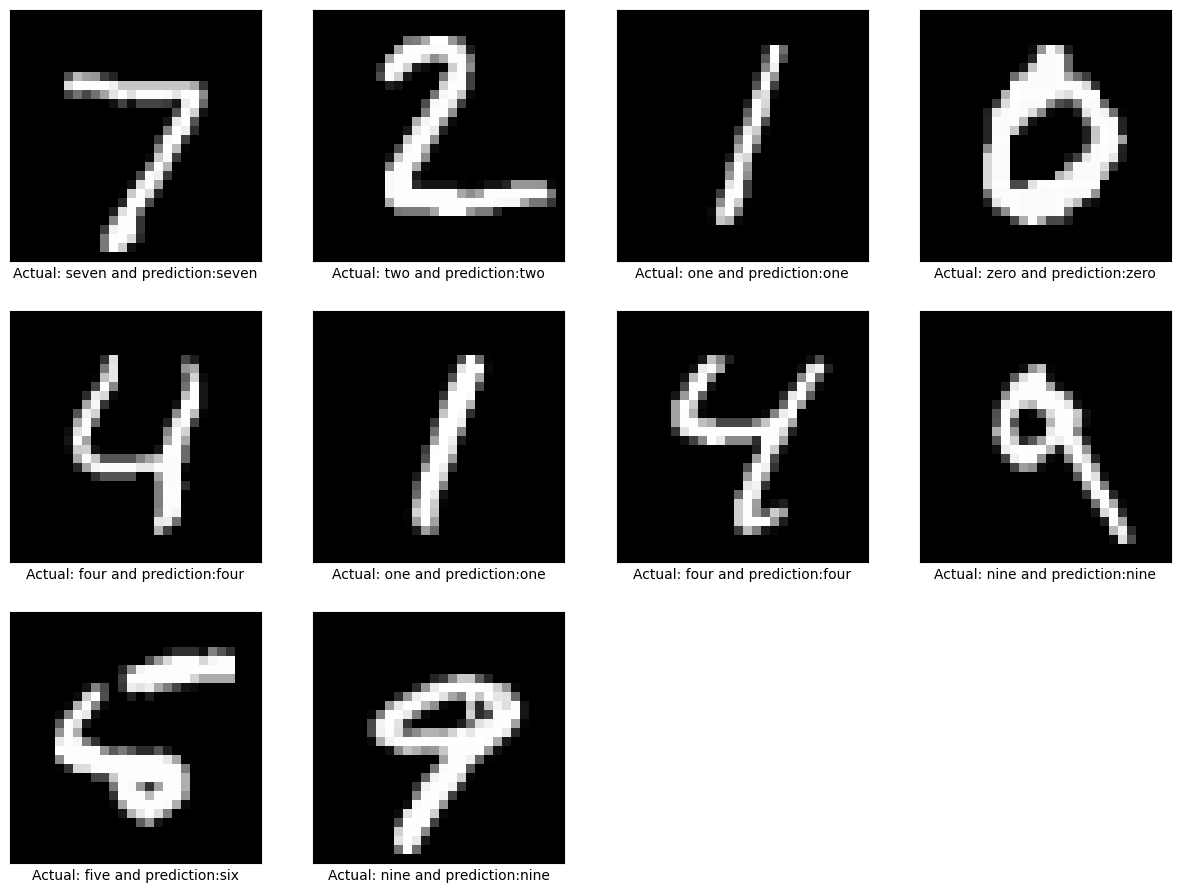

In [47]:
col_name=['zero','one','two','three','four','five','six','seven','eight','nine']

plt.figure(figsize=(15,15))
for i in y_test_unique:
    plt.subplot(4,4,i+1)
    plt.imshow(X_test[i].reshape(28,28,1),cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(f'Actual: {col_name[y_test[i]]} and prediction:{col_name[y_pred[i]]}')
plt.show()